In [12]:
import time

from model import Model, Optimizer, WavenetData

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display
import torch
import numpy as np
#%matplotlib inline
%matplotlib notebook

In [19]:
model = Model(num_time_samples=10000, 
              num_blocks=1, 
              num_layers=10, 
              num_hidden=32, 
              num_classes=64)
torch.save(model, 'untrained_model')
print('model: ', model)
print('scope: ', model.scope)

optimizer = Optimizer(model, 
                      stop_threshold=0.5)

current scope:  1
current scope:  3
current scope:  7
current scope:  15
current scope:  31
current scope:  63
current scope:  127
current scope:  255
current scope:  511
current scope:  1023
scope:  2047
model:  Model (
  (main): Sequential (
    (b0-l0.conv_dilation1): ConvDilated (
      (conv): Conv1d(1, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l1.conv_dilation2): ConvDilated (
      (conv): Conv1d(32, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l2.conv_dilation4): ConvDilated (
      (conv): Conv1d(32, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l3.conv_dilation8): ConvDilated (
      (conv): Conv1d(32, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l4.conv_dilation16): ConvDilated (
      (conv): Conv1d(32, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l5.conv_dilation32): ConvDilated (
      (conv): Conv1d(32, 32, kernel_size=(2,), stride=(1,), bias=False)
    )
    (b0-l6.conv_dilation64): ConvDi

In [20]:
data = WavenetData('sine.wav',
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.num_classes)
start_tensor = data.get_minibatch([12345])[0].squeeze()
plt.ion()
plt.plot(start_tensor[-200:].numpy())
plt.ioff()

<IPython.core.display.Javascript object>


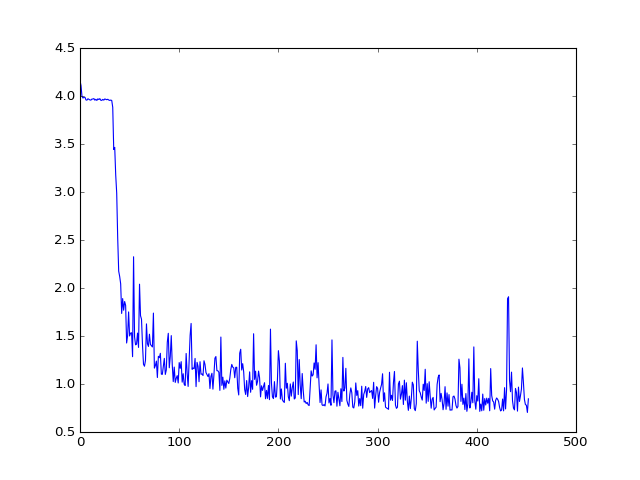

start training...


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

def hook(losses):
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    #print(losses[-1])
    
optimizer.hook = hook

#Tracer()()

print('start training...')
tic = time.time()
optimizer.train(data)
toc = time.time()
print('Training took {} seconds.'.format(toc-tic))

In [16]:
torch.save(model, 'trained_model')

#start_tensor = torch.zeros((model.scope)) + 0
start_tensor = data.get_minibatch([12345])[0].squeeze()
print('generate...')
tic = time.time()
generated = model.generate(start_data=start_tensor, num_generate=200)
#generated = model.fast_generate(40000, first_sample=0.1)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

generate...
0.0
0.0
0.40625
-0.6875
-0.875
-0.96875
-1.0
-0.96875
0.78125
0.59375
0.34375
0.0
0.0
0.40625
0.625
0.8125
0.90625
-1.0
-0.96875
0.78125
0.59375
0.34375
0.0
0.0
-0.4375
-0.6875
0.8125
-0.96875
-1.0
-0.96875
-0.84375
-0.6875
0.34375
0.0
0.0
0.375
-0.6875
0.8125
0.90625
-1.0
-0.96875
0.8125
-0.6875
0.34375
0.0
0.0
-0.4375
-0.6875
-0.84375
-0.96875
-1.0
-0.96875
0.8125
-0.6875
0.34375
0.0
0.0
-0.4375
0.59375
-0.84375
0.90625
-1.0
0.90625
0.8125
0.625
0.34375
0.0
0.0
-0.4375
-0.65625
-0.84375
-0.96875
-1.0
0.90625
0.8125
0.625
-0.4375
0.0
0.0
0.34375
-0.65625
0.78125
0.90625
-1.0
0.90625
0.8125
0.625
-0.4375
0.0
0.0
0.34375
0.59375
-0.84375
-0.96875
-1.0
-1.0
0.8125
-0.71875
0.40625
0.0
0.0
0.34375
0.59375
0.78125
0.90625
-1.0
-1.0
0.8125
-0.71875
0.40625
0.0
0.0
0.34375
-0.625
0.78125
-0.96875
-1.0
-1.0
0.8125
-0.71875
-0.5
0.0
0.0
0.34375
-0.625
-0.8125
0.90625
-1.0
-1.0
0.8125
0.65625
-0.5
0.0
0.0
-0.375
-0.625
-0.8125
-0.96875
-1.0
-1.0
-0.90625
0.65625
-0.5
0.0
0.0
-0.375


<IPython.core.display.Javascript object>


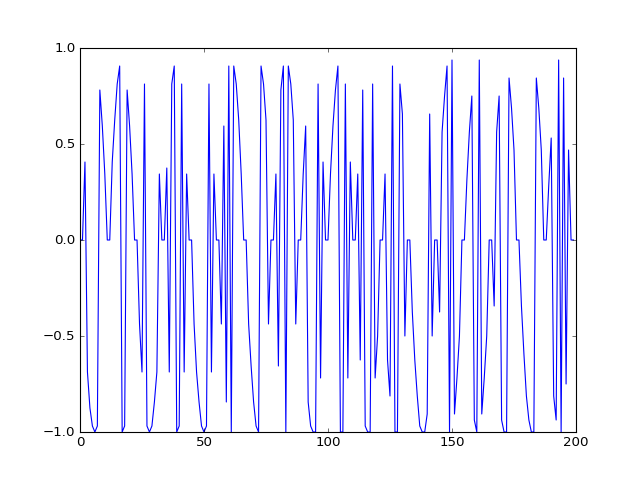

In [17]:
fig = plt.figure()
plt.plot(generated.data[-200:].numpy())

generate...
Generating took 2.052022933959961 seconds.


<IPython.core.display.Javascript object>


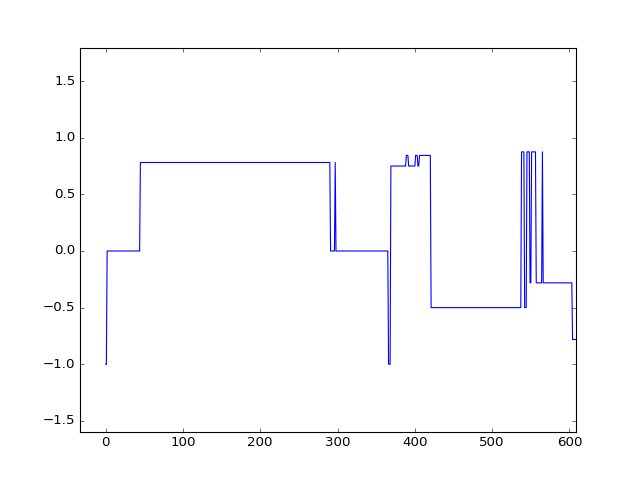

In [11]:
print('generate...')
tic = time.time()
[generated, support_generated] = model.fast_generate(200, first_samples=start_tensor)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

fig = plt.figure()
plt.plot(support_generated)